In [59]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

# Carga de los datos

In [2]:
#Datos originales
golden_data=pd.read_csv("./datasets/Colcom2018CleanedScaled.csv",header=0,sep=';')

In [3]:
#Datos adversarios del 2021
advData=pd.read_csv('datasets/Adversarial_data.csv')
cols=['tcp_packets','dist_port_tcp','external_ips','vulume_bytes','udp_packets','source_app_packets','remote_app_packets','source_app_bytes','remote_app_bytes','dns_query_times']
advData.columns=cols
advData['type']='malicious'

In [4]:
#Datos adversarios del 2018
dataAdversarial2018=pd.read_csv("datasets/Colcom2018AdversarialDataTrain.csv",header=0,sep=';')

In [5]:
#Malware generado a traves de interaccion blackbox
maldata2021=pd.read_csv('datasets/malicious_data_generated.csv')
maldata2021.columns=cols
maldata2021['type']='malicious'

# Comparación de los datos de tipo malware

In [52]:
#Datos originales
golden_data[golden_data.type=='malicious'].describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
count,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000
mean,0.554860,2.253422,-0.045633,0.557717,0.010825,0.536008,0.863371,3.650236,0.548932,0.422079
std,3.220602,18.069049,0.710032,2.810299,0.351354,3.106805,5.399236,25.833662,2.762755,4.009438
min,-0.290698,0.000000,-0.666667,-0.312383,0.000000,-0.322222,-0.282353,-0.164688,-0.324081,-0.750000
25%,-0.290698,0.000000,-0.666667,-0.312383,0.000000,-0.300000,-0.258824,-0.151903,-0.310083,-0.500000
50%,-0.151163,0.000000,-0.333333,-0.186501,0.000000,-0.133333,-0.117647,-0.099953,-0.158541,-0.250000
75%,0.186047,0.000000,0.333333,0.233372,0.000000,0.177778,0.176471,0.147614,0.222010,0.250000
max,54.406977,898.000000,5.666667,64.528792,12.000000,52.122222,78.423529,387.818441,62.931684,86.250000


In [9]:
#Malware generado a traves de interaccion blackbox
maldata2021.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,-25.024016,-30.883923,-36.460307,-9.762508,-29.909940,14.206805,-28.700467,25.201468,-22.823215,58.330220
std,50.926012,50.309654,45.123524,57.303850,49.224268,54.519860,48.381512,47.900118,52.605011,29.093945
min,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-98.000000
25%,-67.000000,-71.000000,-71.000000,-59.000000,-70.000000,-25.000000,-68.000000,2.000000,-67.000000,39.000000
50%,-29.000000,-39.000000,-42.000000,-15.000000,-36.000000,18.000000,-34.000000,27.000000,-30.000000,62.000000
75%,2.000000,-8.000000,-13.000000,38.000000,-6.500000,58.000000,0.000000,64.000000,11.000000,81.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [8]:
#Datos adversarios del 2021
advData.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,-28.871743,-37.224449,-35.472946,-12.751503,-29.597194,18.833667,-18.619238,22.228457,-17.352705,39.256513
std,54.187237,54.763435,47.964394,56.872103,52.270843,59.174631,52.043495,55.228295,55.412943,34.731187
min,-186.000000,-181.000000,-168.000000,-143.000000,-142.000000,-138.000000,-137.000000,-156.000000,-116.000000,-115.000000
25%,-70.000000,-75.000000,-71.000000,-60.000000,-68.500000,-19.000000,-55.000000,-7.000000,-64.000000,18.000000
50%,-35.000000,-43.000000,-37.000000,-15.000000,-35.000000,24.000000,-19.000000,27.000000,-25.000000,40.000000
75%,3.000000,-12.000000,-9.000000,27.000000,-2.000000,68.000000,8.000000,66.000000,18.000000,65.000000
max,110.000000,128.000000,95.000000,148.000000,127.000000,151.000000,198.000000,145.000000,138.000000,98.000000


In [10]:
#Datos adversarios del 2018
dataAdversarial2018.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
count,500.000000,500.000000,500.000000,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000
mean,67.321099,2.124000,-0.030000,30.956041,0.0,63.568732,43.384903,344.051276,31.881315,0.480000
std,39.705018,9.175675,0.665823,36.359889,0.0,37.792974,48.927479,206.944185,36.030482,3.952955
min,-0.124738,0.000000,-0.666667,-0.312383,0.0,-0.272351,-0.282353,0.769021,-0.324081,-0.750000
25%,33.205399,0.000000,-0.333333,-0.033256,0.0,30.686286,0.052941,162.057835,0.078749,-0.500000
50%,65.651707,0.000000,-0.333333,12.349518,0.0,63.654625,19.931683,336.592896,14.566025,-0.250000
75%,102.769899,0.000000,0.333333,60.223916,0.0,96.269249,83.910425,532.482187,65.059143,0.500000
max,133.332947,119.000000,4.333333,109.131622,0.0,127.434770,147.954122,712.607935,106.074349,64.500000


## Graficamente

### Media de los datos de tipo malware generados contra los datos malware originales

In [85]:
#datos para el grafico
colsTemp=['tcp_packets','dist_port_tcp','external_ips','vulume_bytes','udp_packets','source_app_packets','remote_app_packets',' source_app_bytes','remote_app_bytes','dns_query_times']
d={'dataType':cols,'mean_golden_malware':[golden_data[golden_data.type=='malicious'][col].mean() for col in colsTemp],'mean_adv2021':[advData[col].mean() for col in cols],
   'mean_adv_2018':[dataAdversarial2018[col].mean() for col in colsTemp],'mean_mal_2021':[maldata2021[col].mean() for col in cols]}
df=pd.DataFrame(data=d)

In [83]:
df

,dataType,mean_golden malware,mean_adv2021,mean_adv_2018,mean_mal_2021
0,tcp_packets,0.554860,-28.871743,67.321099,-25.024016
1,dist_port_tcp,2.253422,-37.224449,2.124000,-30.883923
2,external_ips,-0.045633,-35.472946,-0.030000,-36.460307
3,vulume_bytes,0.557717,-12.751503,30.956041,-9.762508
4,udp_packets,0.010825,-29.597194,0.000000,-29.909940
5,source_app_packets,0.536008,18.833667,63.568732,14.206805
6,remote_app_packets,0.863371,-18.619238,43.384903,-28.700467
7,source_app_bytes,3.650236,22.228457,344.051276,25.201468
8,remote_app_bytes,0.548932,-17.352705,31.881315,-22.823215
9,dns_query_times,0.422079,39.256513,0.480000,58.330220


([<matplotlib.axis.XTick at 0x1c849fb6310>,
 [Text(0, 0, 'tcp_packets'),
  Text(1, 0, 'dist_port_tcp'),
  Text(2, 0, 'external_ips'),
  Text(3, 0, 'vulume_bytes'),
  Text(4, 0, 'udp_packets'),
  Text(5, 0, 'source_app_packets'),
  Text(6, 0, 'remote_app_packets'),
  Text(7, 0, 'source_app_bytes'),
  Text(8, 0, 'remote_app_bytes'),
  Text(9, 0, 'dns_query_times')])

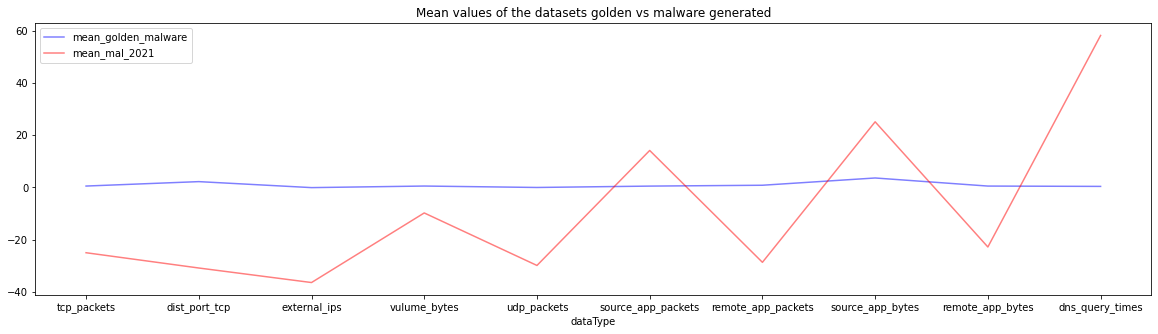

In [86]:
ax=plt.gca()
df.plot(kind='line',x='dataType',y='mean_golden_malware',ax=ax,color='blue',alpha=0.5)
df.plot(kind='line',x='dataType',y='mean_mal_2021',ax=ax,color='red',alpha=0.5)
ax.set_title('Mean values of the datasets golden vs malware generated')
plt.rcParams["figure.figsize"]=(20, 5)
plt.xticks(df.index, df['dataType'], rotation=0)

([<matplotlib.axis.XTick at 0x1c84a5682e0>,
 [Text(0, 0, 'tcp_packets'),
  Text(1, 0, 'dist_port_tcp'),
  Text(2, 0, 'external_ips'),
  Text(3, 0, 'vulume_bytes'),
  Text(4, 0, 'udp_packets'),
  Text(5, 0, 'source_app_packets'),
  Text(6, 0, 'remote_app_packets'),
  Text(7, 0, 'source_app_bytes'),
  Text(8, 0, 'remote_app_bytes'),
  Text(9, 0, 'dns_query_times')])

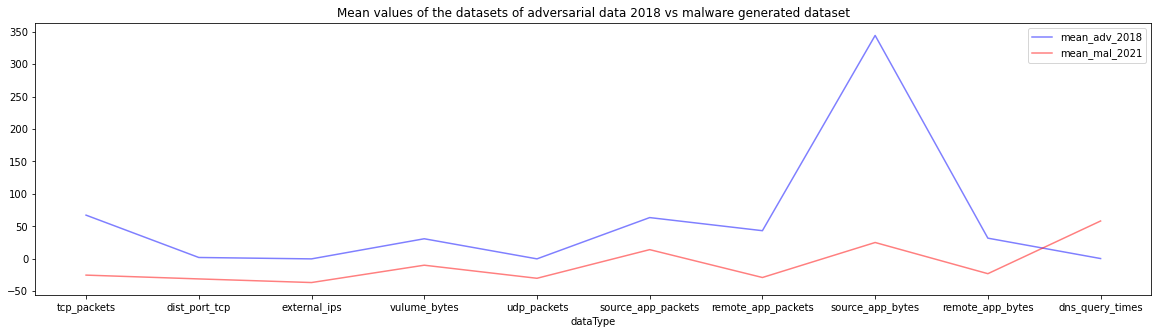

In [87]:
ax=plt.gca()
df.plot(kind='line',x='dataType',y='mean_adv_2018',ax=ax,color='blue',alpha=0.5)
df.plot(kind='line',x='dataType',y='mean_mal_2021',ax=ax,color='red',alpha=0.5)
ax.set_title('Mean values of the datasets of adversarial data 2018 vs malware generated dataset')
plt.rcParams["figure.figsize"]=(20, 5)
plt.xticks(df.index, df['dataType'], rotation=0)

([<matplotlib.axis.XTick at 0x1c849846640>,
 [Text(0, 0, 'tcp_packets'),
  Text(1, 0, 'dist_port_tcp'),
  Text(2, 0, 'external_ips'),
  Text(3, 0, 'vulume_bytes'),
  Text(4, 0, 'udp_packets'),
  Text(5, 0, 'source_app_packets'),
  Text(6, 0, 'remote_app_packets'),
  Text(7, 0, 'source_app_bytes'),
  Text(8, 0, 'remote_app_bytes'),
  Text(9, 0, 'dns_query_times')])

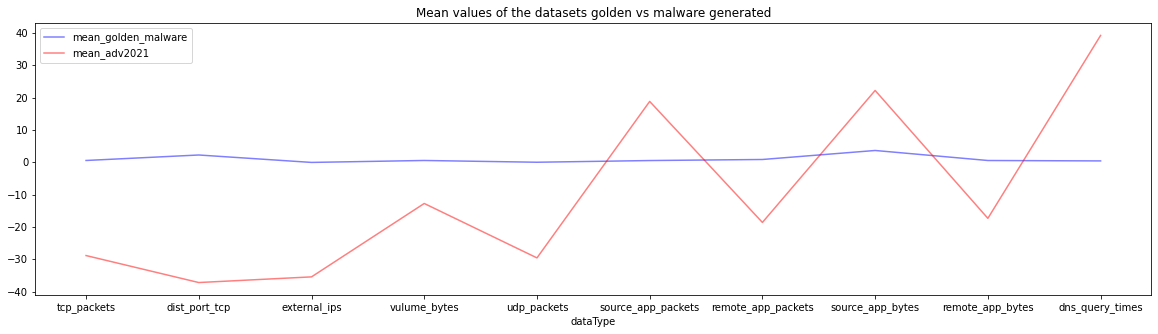

In [89]:
ax=plt.gca()
df.plot(kind='line',x='dataType',y='mean_golden_malware',ax=ax,color='blue',alpha=0.5)
df.plot(kind='line',x='dataType',y='mean_adv2021',ax=ax,color='red',alpha=0.5)
ax.set_title('Mean values of the datasets golden vs malware generated')
plt.rcParams["figure.figsize"]=(20, 5)
plt.xticks(df.index, df['dataType'], rotation=0)

([<matplotlib.axis.XTick at 0x1c849124160>,
 [Text(0, 0, 'tcp_packets'),
  Text(1, 0, 'dist_port_tcp'),
  Text(2, 0, 'external_ips'),
  Text(3, 0, 'vulume_bytes'),
  Text(4, 0, 'udp_packets'),
  Text(5, 0, 'source_app_packets'),
  Text(6, 0, 'remote_app_packets'),
  Text(7, 0, 'source_app_bytes'),
  Text(8, 0, 'remote_app_bytes'),
  Text(9, 0, 'dns_query_times')])

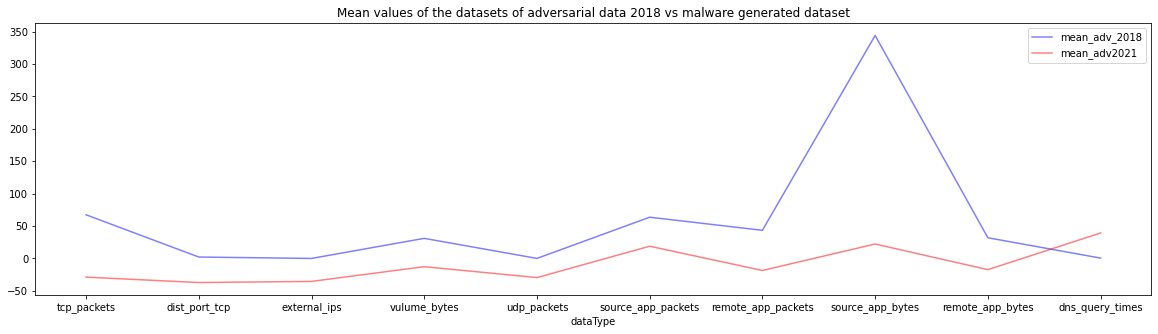

In [90]:
ax=plt.gca()
df.plot(kind='line',x='dataType',y='mean_adv_2018',ax=ax,color='blue',alpha=0.5)
df.plot(kind='line',x='dataType',y='mean_adv2021',ax=ax,color='red',alpha=0.5)
ax.set_title('Mean values of the datasets of adversarial data 2018 vs malware generated dataset')
plt.rcParams["figure.figsize"]=(20, 5)
plt.xticks(df.index, df['dataType'], rotation=0)

([<matplotlib.axis.XTick at 0x1c84a1d6280>,
 [Text(0, 0, 'tcp_packets'),
  Text(1, 0, 'dist_port_tcp'),
  Text(2, 0, 'external_ips'),
  Text(3, 0, 'vulume_bytes'),
  Text(4, 0, 'udp_packets'),
  Text(5, 0, 'source_app_packets'),
  Text(6, 0, 'remote_app_packets'),
  Text(7, 0, 'source_app_bytes'),
  Text(8, 0, 'remote_app_bytes'),
  Text(9, 0, 'dns_query_times')])

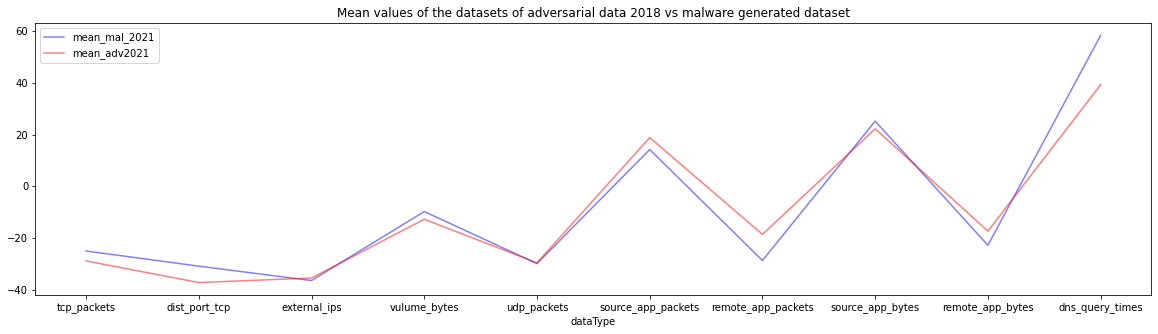

In [91]:
ax=plt.gca()
df.plot(kind='line',x='dataType',y='mean_mal_2021',ax=ax,color='blue',alpha=0.5)
df.plot(kind='line',x='dataType',y='mean_adv2021',ax=ax,color='red',alpha=0.5)
ax.set_title('Mean values of the datasets of adversarial data 2018 vs malware generated dataset')
plt.rcParams["figure.figsize"]=(20, 5)
plt.xticks(df.index, df['dataType'], rotation=0)